# 6.3 - Geographical Visualizations with Python

### This script contains the following points:

* 1 - Import Data & Libraries
* 2 - Data Wrangling
    * I) Data Consistency
    * II) Duplicates
    * III) Extreme Values
* 3 - Plotting a Choropleth
* 4 - Partial Results
* 5 - Exporting Data & Visualizations

---

## 1. Import Data & Libraries

In [25]:
# Import libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [26]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [27]:
# Import JSON file for the U.S. regions

us_regions_geo = r'/Users/juanigalvalisi/Desktop/Data Analyst/Achievement 6/6.3 - Geographical Visualizations with Python/geoJSON_us_regions.json'

In [28]:
# Look at the JSON file contents

json_us_regions = open(us_regions_geo)
  
# returns JSON object as a dictionary
data = json.load(json_us_regions)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'northwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.1634034

In [29]:
# Define path

path = r'/Users/juanigalvalisi/Desktop/Data Analyst/Achievement 6/'

In [30]:
# Import .PKL

df_medical_costs = pd.read_pickle(os.path.join(path, 'medical_cost_categories.pkl'))

In [31]:
# Check the output of df_medical_costs

df_medical_costs.head()

,Age,Sex,Body_mass_index,Children,Smoker,Region,Charges,Age_range,Cost_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Middle cost
1,18,male,33.770,1,no,southeast,1725.55230,Young,Low cost
2,28,male,33.000,3,no,southeast,4449.46200,Young,Low cost
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Middle cost
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Low cost


In [32]:
# Check the output of df_medical_costs

df_medical_costs.shape

(1337, 9)

In [33]:
# Check the output of df_medical_costs

df_medical_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1337 non-null   int64  
 1   Sex              1337 non-null   object 
 2   Body_mass_index  1337 non-null   float64
 3   Children         1337 non-null   int64  
 4   Smoker           1337 non-null   object 
 5   Region           1337 non-null   object 
 6   Charges          1337 non-null   float64
 7   Age_range        1337 non-null   object 
 8   Cost_category    1337 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 104.5+ KB


---

## 2. Data Wrangling & Cleaning

### I) Data Consistency

In [34]:
# Check for missing values

df_medical_costs.isnull().sum()

Age                0
Sex                0
Body_mass_index    0
Children           0
Smoker             0
Region             0
Charges            0
Age_range          0
Cost_category      0
dtype: int64

### II) Duplicates

In [35]:
dups = df_medical_costs.duplicated()

In [36]:
dups.shape # no dups

(1337,)

### III) Extreme Values

<AxesSubplot:xlabel='Age', ylabel='Count'>

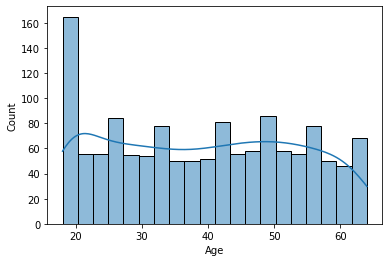

In [37]:
sns.histplot(df_medical_costs['Age'], bins=20, kde = True) # shows extreme values for 'Age'

<AxesSubplot:xlabel='Charges', ylabel='Count'>

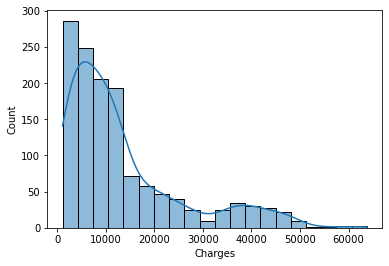

In [38]:
sns.histplot(df_medical_costs['Charges'], bins=20, kde = True) # shows extreme values for 'Charges'

<AxesSubplot:xlabel='Body_mass_index', ylabel='Count'>

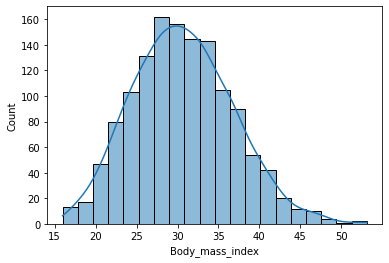

In [39]:
sns.histplot(df_medical_costs['Body_mass_index'], bins=20, kde = True) # shows extreme values for 'Body mass index'

<AxesSubplot:xlabel='Children', ylabel='Count'>

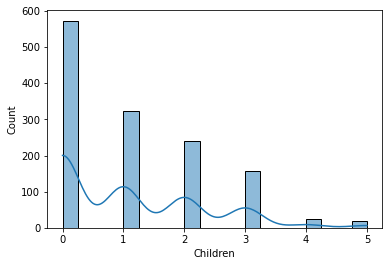

In [40]:
sns.histplot(df_medical_costs['Children'], bins=20, kde = True) # shows extreme values for 'Children'

# 3. Plotting a Choropleth

In [41]:
# Create a subset data

#data_to_plot = df_medical_costs.groupby('Region').count().reset_index()
#data_to_plot = df_medical_costs.groupby('Region').agg(mean_charges =('Charges', 'mean'), mean_age=('Age', 'mean'))
data_to_plot = df_medical_costs.groupby(['Region']).mean().reset_index()                                                      

data_to_plot

,Region,Age,Body_mass_index,Children,Charges
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.259259,29.195494,1.151235,12450.840844
2,southeast,38.939560,33.355989,1.049451,14735.411438
3,southwest,39.455385,30.596615,1.141538,12346.937377


In [42]:
# Checking subset for nulls

data_to_plot.isnull().sum()

Region             0
Age                0
Body_mass_index    0
Children           0
Charges            0
dtype: int64

In [43]:
# 1) Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 1], zoom_start = 1, bins = 1)

# Set colors

custom_scale = (data_to_plot['Charges'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()

# 2) Choropleth maps bind Pandas Data Frames and json geometries
folium.Choropleth(
    geo_data = data, 
    data = data_to_plot,
    columns = ['Region', 'Charges'],
    key_on = 'feature.properties.name', # check your json file to see where the KEY is located
    threshold_scale = custom_scale, #use the custom scale we created for legend
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.5,
    legend_name = 'Region',
    label = "Region").add_to(map)

# 3) Apply the chosen argument settings to the map. 
folium.LayerControl().add_to(map)

map

---

# 4. Partial Results

### Initial question:

###### Which region has the highest costs? Are any relevant correlations between one region and another concerning a more significant number of the elderly population?

Considering the results of each region, the mean detail is the following:

    * northeast	13406.384516
    * northwest	12450.840844
    * southeast	14735.411438
    * southwest	12346.937377

In this sense, the **southeast region** has the highest average charges among the other regions. At a glance, we cannot say that a more significant number of the elderly population is associated with a greater number of charges. Further investigation should be carried out to clarify this correlation.

---

# 5.  Exporting Data & Visualizations

In [44]:
# Export df_medical_costs as .pkl

df_medical_costs.to_pickle(os.path.join(path, 'medical_cost_geo_viz.pkl'))